Decomposing the timeseries in 4 components using predicted data

Forecast CSV Columns: ['Date', 'Predicted_Price']


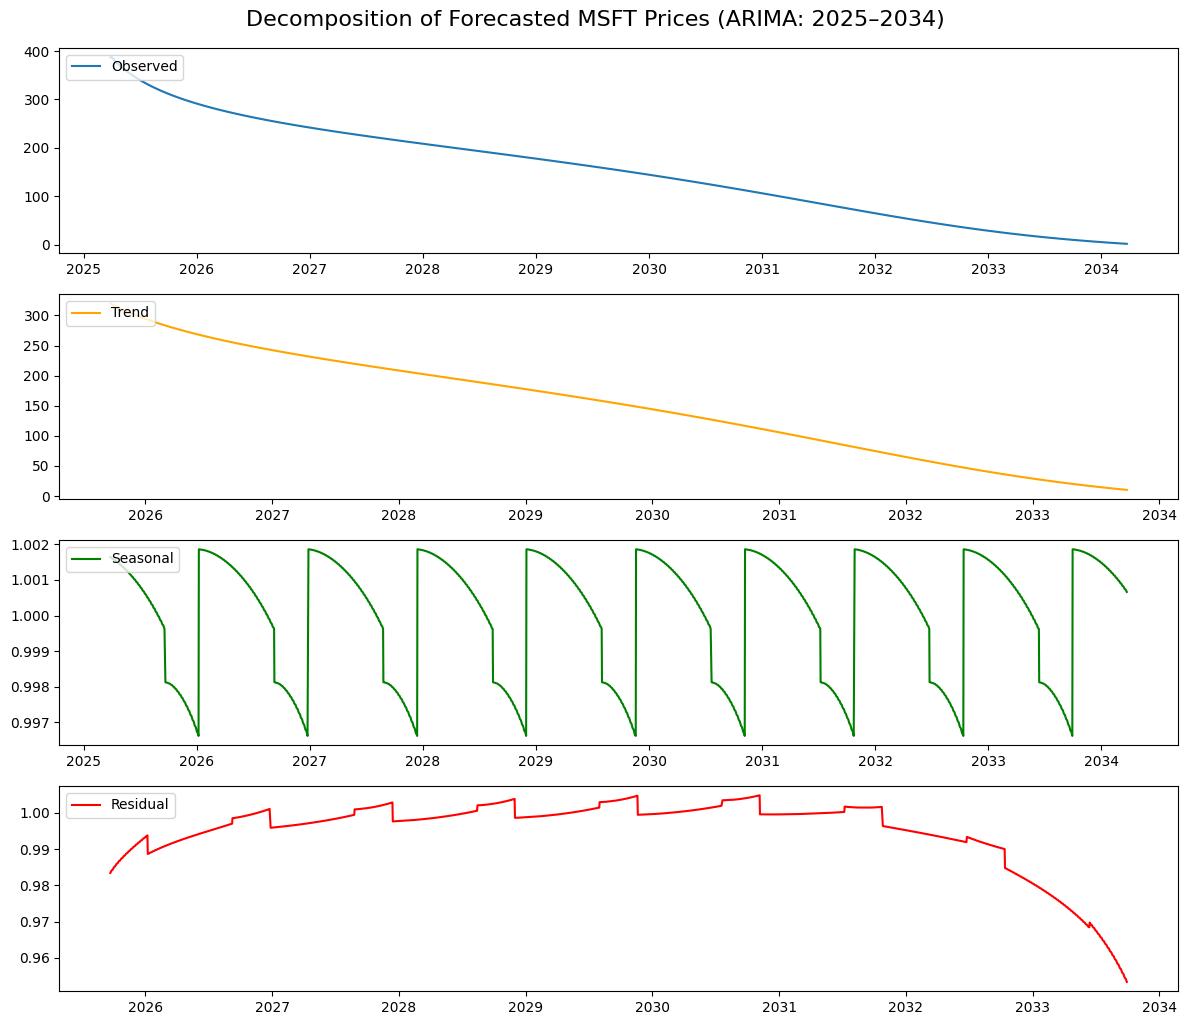

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- 1. Load Forecasted Data ---
file_path = r"D:\My Projects_BU_Snehal\Time-Series-Model\MSFT_Prediction_2025_to_2034.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])

# Check column names
print("Forecast CSV Columns:", df.columns.tolist())

# Automatically use the first column that is not 'Date'
forecast_col = [col for col in df.columns if col != 'Date'][0]

# Keep only 'Date' and forecast column, rename to 'Forecasted_Close'
df = df[['Date', forecast_col]].dropna()
df.rename(columns={forecast_col: 'Forecasted_Close'}, inplace=True)
df.set_index('Date', inplace=True)

# --- 2. Set Frequency (Business Days) ---
df = df.asfreq('B')  # Assumes business day frequency

# --- 3. Decompose Time Series (Yearly seasonality ≈ 252 trading days) ---
result = seasonal_decompose(df['Forecasted_Close'], model='multiplicative', period=252)

# --- 4. Plot the Decomposed Components ---
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.suptitle("Decomposition of Forecasted MSFT Prices (ARIMA: 2025–2034)", fontsize=16, y=1.02)
plt.show()